In [1]:
from hydra.utils import instantiate 
from hydra import initialize, compose
import matplotlib.pyplot as plt
from awesome_ssl.models import byol 
import torch

In [2]:
# get dataset
def instantiate_dataset(relative_path): 
    config_path = "../configs"
    with initialize(config_path): 
        dataset = instantiate(compose(relative_path))
        return dataset

def show_image(image): 
    plt.figure()
    return plt.imshow(image.permute(1, 2, 0))

# Examine Augmentations

In [3]:
train_dataset = instantiate_dataset("train_dataset/imagenet_byol.yaml").train_dataset
train_dataset.debug = True

In [36]:
original, im1, im2, label = train_dataset[22]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


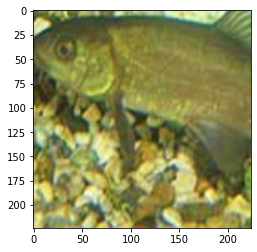

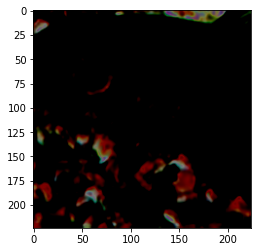

In [37]:
show_image(original)
show_image(im1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


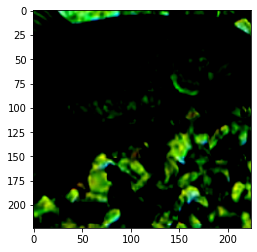

In [38]:
show_image(im2)

# Examine Model


In [ ]:
checkpoint_path = "/mnt/nfs/home/yunxingl/self-supervised-learning/outputs/2021-10-19/17-47-51/BYOL/16rxz5ub/checkpoints/epoch=9-step=64049.ckpt"
model = byol.BYOL.load_from_checkpoint(checkpoint_path).eval()
val_dataset = instantiate_dataset("val_dataset/imagenet_val.yaml").val_dataset

In [ ]:
def compute_square_distance(im1, im2):
    embed_1 = model.prediction_head(model.online_encoder(im1.unsqueeze(0)))
    embed_2 = model.prediction_head(model.online_encoder(im2.unsqueeze(0)))
    return torch.norm(embed_1 - embed_2)

In [ ]:
image_1, label_1 = val_dataset[2000]
image_2, label_2 = val_dataset[2001]
image_3, label_3 = val_dataset[8001]
image_4, label_4 = val_dataset[12005]
print(label_1, label_2, label_3, label_4)
show_image(image_1)
show_image(image_2)
show_image(image_3)
show_image(image_4)

In [ ]:
print(compute_square_distance(image_1, image_2))

In [ ]:
print(compute_square_distance(image_2, image_3))
print(compute_square_distance(image_2, image_4))
print(compute_square_distance(image_3, image_4))
print(compute_square_distance(image_1, image_3))
print(compute_square_distance(image_1, image_4))